#Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
laptop = pd.read_csv('laptop_price.csv', encoding='latin-1')
laptop = laptop.drop(columns = ['laptop_ID'])
laptop.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [ ]:
laptop.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

##Korelation Map

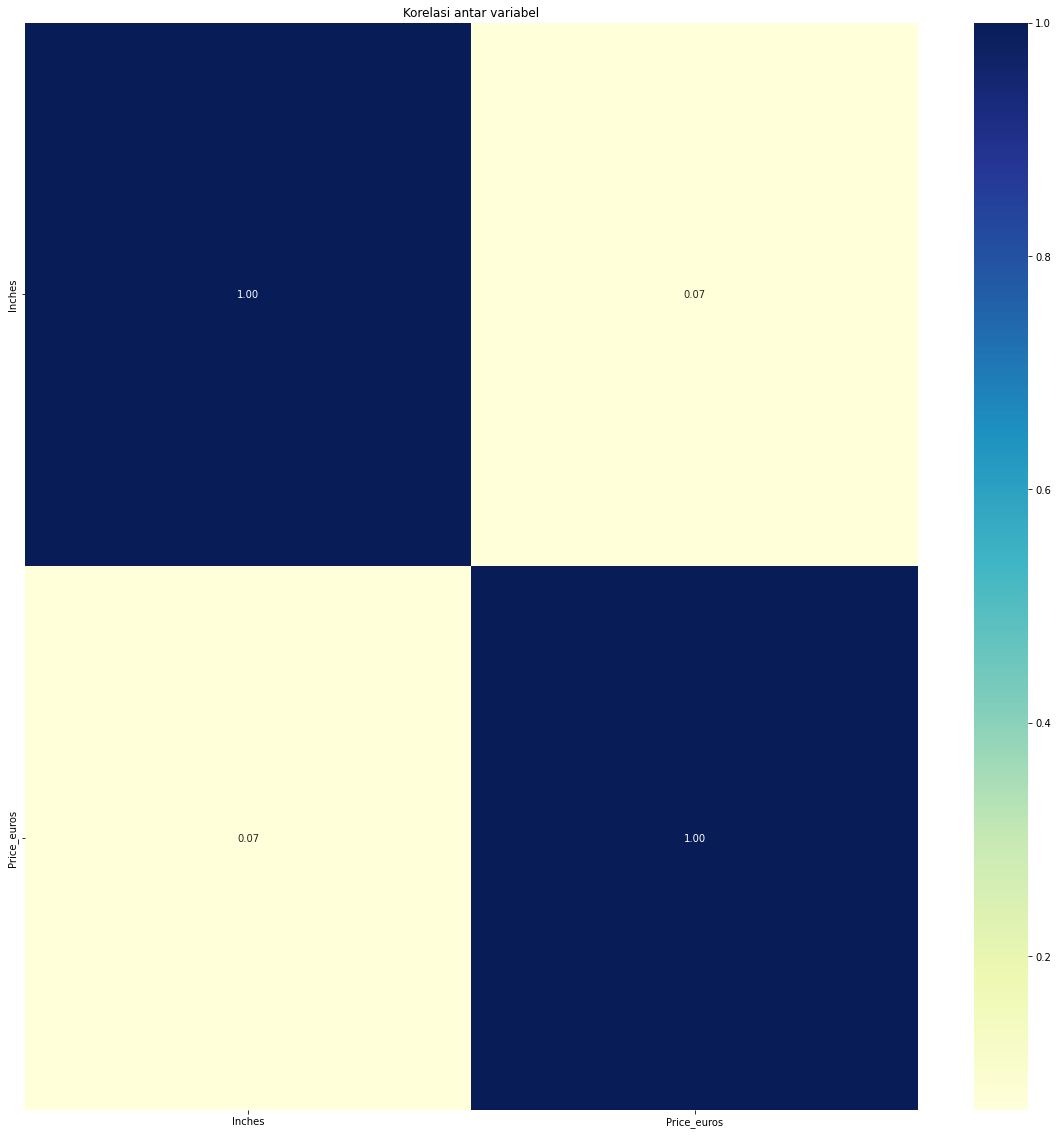

In [ ]:
data = laptop[["Inches", "Price_euros"]]
# print(data)
plt.figure(figsize = (20, 20))
plt.title("Korelasi antar variabel")
sns.heatmap(data.corr(), fmt=".2f", annot = True, cmap = "YlGnBu")

##Preprocessing

In [ ]:
le = LabelEncoder()
a = laptop.iloc[:,:-1]
for i in a :
  laptop[i] = le.fit_transform(laptop[i])

In [ ]:
x = laptop.iloc[:,:-1]
y = laptop["Price_euros"]

##Model

In [ ]:
regressor = LinearRegression().fit(x,y)

In [ ]:
print("intercept:", regressor.intercept_) # This is the y-intercept 
print("coefficients of predictors:", regressor.coef_) # These are the weights or regression coefficients.

intercept: -706.4884600757152
coefficients of predictors: [ 1.15757618e+01 -2.70948266e-02  8.45085755e+00 -9.24349015e+00
  1.66013418e+01  9.78658856e+00 -4.72516759e+01  1.08804680e+01
  6.51080581e+00  1.35247948e+02  3.60053935e-01]


In [ ]:
dLaptop = x.iloc[0]
dLaptop

Company               1
Product             300
TypeName              4
Inches                7
ScreenResolution     23
Cpu                  65
Ram                   8
Memory                4
Gpu                  58
OpSys                 8
Weight               38
Name: 0, dtype: int64

In [ ]:
pred_price = regressor.predict(dLaptop.values.reshape(1, -1))
print("predicted value:", pred_price[0])

predicted value: 1422.8178045230504


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print("actual value:", y[0])

actual value: 1339.69


In [ ]:
# Predicting the results
y_pred = regressor.predict(x)
y_pred[:10]

array([1422.81780452,  969.57127452,  834.93170155, 1891.91704558,
       1579.46740384,  196.25888069, 1392.45628685, 1111.01735893,
       2009.08987616, 1176.33258965])

In [ ]:
prices = pd.DataFrame({"actual": y,
          "predicted": y_pred})
prices.head(10)

,actual,predicted
0,1339.69,1422.817805
1,898.94,969.571275
2,575.00,834.931702
3,2537.45,1891.917046
4,1803.60,1579.467404
5,400.00,196.258881
6,2139.97,1392.456287
7,1158.70,1111.017359
8,1495.00,2009.089876
9,770.00,1176.332590


In [ ]:
r2_score(y,y_pred)

0.47175383708455076

###Split Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 9)

###Lasso

In [ ]:
lasso_model=Lasso(alpha=140, max_iter=1000, random_state=9)

# fit the model on one set of data
lasso_model.fit(x_train, y_train)

# evaluate the model on the second set of data
y_pred = lasso_model.predict(x_test)

a = mean_squared_error(y_test, y_pred)

# Getting the r2 score
r2_score(y_test, y_pred)

0.3972798978330021

In [ ]:
y_pred = lasso_model.predict(x_test)
y_pred[:10]

array([ 116.76042362, 1083.02004508,  906.6809732 , 1390.08213481,
        987.58947712, 1743.13151293,  855.08035484,  821.86817482,
       1324.85643806, 1728.02580289])

In [ ]:
prices = pd.DataFrame({"actual": y_test,
          "predicted": y_pred})
prices.head(10)

,actual,predicted
709,655.01,116.760424
223,794.00,1083.020045
666,955.00,906.680973
109,1480.00,1390.082135
2,575.00,987.589477
370,1099.00,1743.131513
748,1126.71,855.080355
59,415.00,821.868175
1238,1169.00,1324.856438
279,849.00,1728.025803


##Ridge

In [ ]:
ridge_model=Ridge(alpha=0.00001, max_iter=1000, random_state=9)

# fit the model on one set of data
ridge_model.fit(x_train, y_train)

# evaluate the model on the second set of data
y_pred = ridge_model.predict(x_test)
mean_squared_error(y_test, y_pred)
r2_score(y_test,y_pred)

0.4542569617939096

In [ ]:
y_pred = ridge_model.predict(x_test)
y_pred[:10]

array([ 198.95305165, 1043.20384531,  860.56138837, 1361.26820641,
        831.23460848, 1778.98514438,  815.90309266,  456.85205629,
       1301.17507243, 1562.44937259])

In [ ]:
prices = pd.DataFrame({"actual": y_test,
          "predicted": y_pred})
prices.head(10)

,actual,predicted
709,655.01,198.953052
223,794.00,1043.203845
666,955.00,860.561388
109,1480.00,1361.268206
2,575.00,831.234608
370,1099.00,1778.985144
748,1126.71,815.903093
59,415.00,456.852056
1238,1169.00,1301.175072
279,849.00,1562.449373


#Logistic Regression

In [ ]:
diabet = pd.read_csv('diabetes_data_upload.csv')

In [ ]:
diabet.tail(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,kelas
510,67,Male,No,No,No,Yes,No,No,No,Yes,No,Yes,No,No,Yes,No,Negative
511,66,Male,No,No,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative
512,43,Male,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Negative
513,62,Female,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes,Positive
514,54,Female,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,No,Positive
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [ ]:
diabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  kelas               520 no

In [ ]:
diabet.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
kelas                 0
dtype: int64

In [ ]:
baru = diabet.iloc[:,:]
for i in a :
  if i == "Age":
    continue
  else:
    baru[i] = le.fit_transform(baru[i])
baru.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,kelas
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


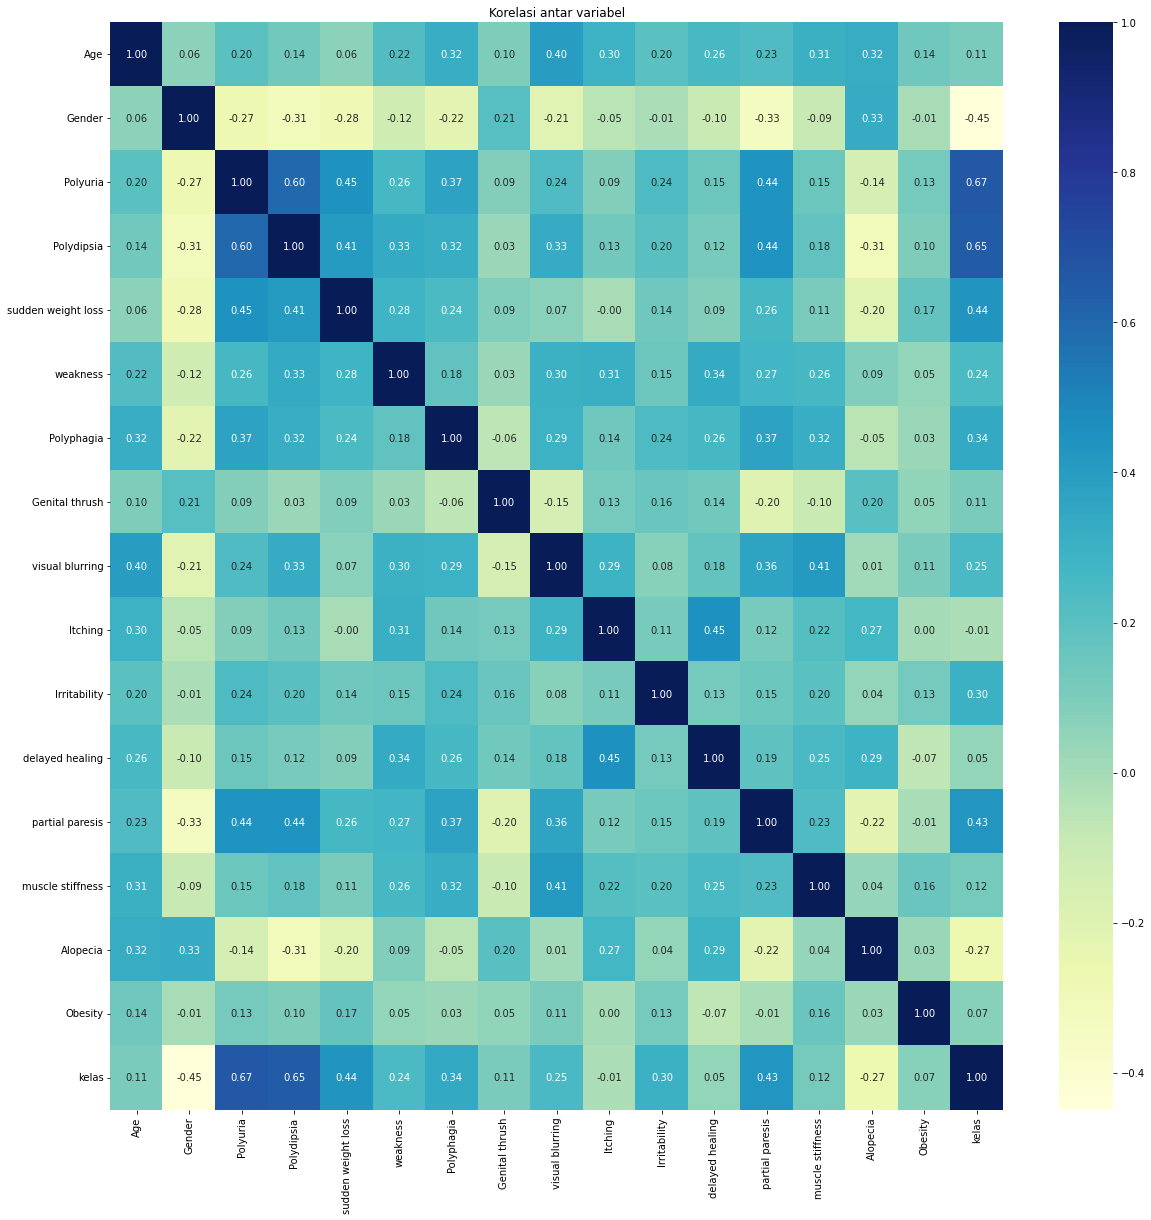

In [ ]:
# print(data)
plt.figure(figsize = (20, 20))
plt.title("Korelasi antar variabel")
sns.heatmap(a.corr(), fmt=".2f", annot = True, cmap = "YlGnBu")

In [ ]:
x = a.iloc[:,:-1]
y = a["kelas"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 9)

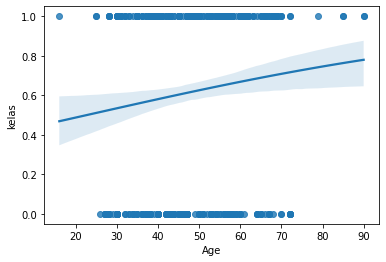

In [ ]:
sns.regplot(x = "Age", y = "kelas", data = a, logistic = True)

In [ ]:
logReg = LogisticRegression().fit(x_train, y_train)

In [ ]:
predict = logReg.predict(x_test)

In [ ]:
coMat = confusion_matrix(predict, y_test)
coMat

array([[31,  8],
       [ 1, 64]])

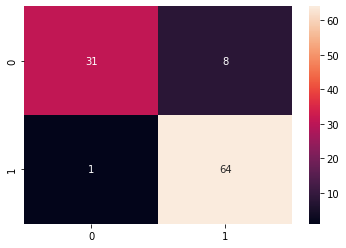

In [ ]:
sns.heatmap(coMat, annot = True)

In [ ]:
precision_score(predict, y_test)

0.8888888888888888

In [ ]:
recall_score(predict, y_test)

0.9846153846153847

In [ ]:
accuracy_score(predict, y_test)

0.9134615384615384

In [ ]:
f1_score(predict, y_test)

0.9343065693430657

In [ ]:
# logRegBr = LogisticRegression().fit(x_train["Age"], y_train)
# x_train.iloc[:,0]
logRegBr = LogisticRegression().fit(x_train.iloc[:,:1], y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


Text(0, 0.5, 'Kelas')

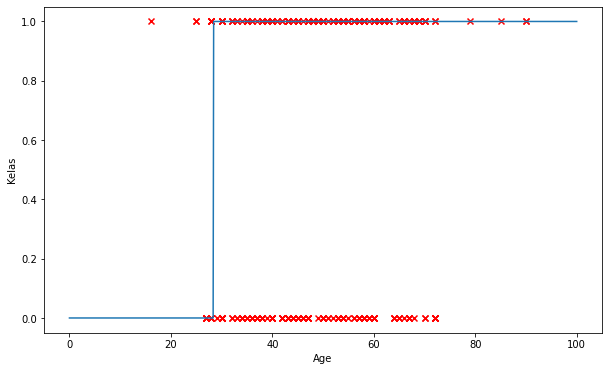

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x_train["Age"], y_train, c='r', marker='x')
xt = np.linspace(0, 100, 1000).reshape(1000,1)
yt = logRegBr.predict(xt)
plt.plot(xt, yt)
plt.xlabel('Age')
plt.ylabel('Kelas')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


Text(0, 0.5, 'Kelas')

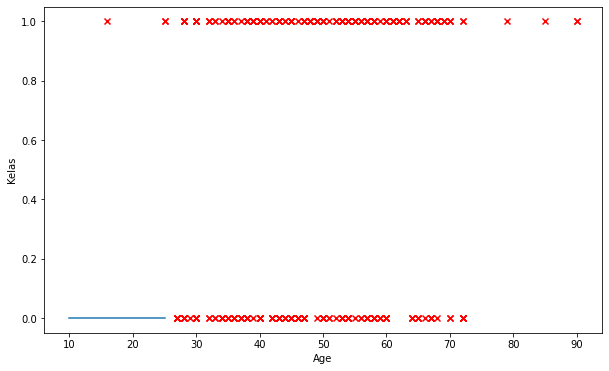

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x_train["Age"], y_train, c='r', marker='x')
xt = np.linspace(10, 25, 1000).reshape(1000,1)
yt = logRegBr.predict(xt)
plt.plot(xt, yt)
plt.xlabel('Age')
plt.ylabel('Kelas')